# Corso di Probabilità e Statistica - il metodo di massima verosimiglianza - parte 1

In questo capitolo analizzeremo i dati tramite il metodo 
di massima verosimiglianza.

Consideriamo una distribuzione teorica $p(x|\lambda)$ dipendendente da uno o più parameteri $\lambda$ e un
set di dati sperimentali $(x_1, ... x_N)$. Il metodo
consente di stimare il miglior parametro $\lambda$ che
descrive i dati, massimizzando la funzione

$$ L = \sum_i \log p(x_i|\lambda) $$

**Esempio: la distribuzione dei carichi di rottura in un materiale** 

Consideriamo dei campioni di ceramica sottoposti a carico e fratturati. Per ogni campione è stato misurato lo stress di rottura. I dati riportano anche altri parametri sperimentali.

Per maggiori dettagli vedi
https://www.itl.nist.gov/div898/handbook/eda/section4/eda42a.htm

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats 
import seaborn as sns
import matplotlib.pylab as plt

In [10]:
#carichiamo il file
strength = pd.read_csv("../data/Strength_ceramic.dat",
                       sep="\s+",skiprows=48)
strength=strength.drop([0])

In [14]:
strength

,Id,Lab,Num,Test,Y,X1,X2,X3,X4,Trt,Set,Llab,Rep,Bat,Sblab,Set2
1,1,1.0,1.0,1.0,608.781,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
2,2,1.0,2.0,1.0,569.670,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
3,3,1.0,3.0,1.0,689.556,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
4,4,1.0,4.0,1.0,747.541,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,2.0,0.75,1.0
5,5,1.0,5.0,1.0,618.134,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.75,1.0,1.0,0.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,956,8.0,26.0,4.0,698.254,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0
477,957,8.0,27.0,4.0,611.999,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,1.0,8.25,32.0
478,958,8.0,28.0,4.0,748.130,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,2.0,8.50,32.0
479,959,8.0,29.0,4.0,530.680,1.0,-1.0,-1.0,-1.0,2.0,2.0,8.25,2.0,1.0,8.25,32.0


Il carico di rottura (strength) è dato dalla variabile Y
come possiamo vedere dalle istruzione in cima al file

In [25]:
with open("../data/Strength_ceramic.dat") as myfile:
    head = [next(myfile) for x in range(24)]

In [26]:
head

['This is Dataplot data file     JAHANMI2.DAT\n',
 'Effect of Machining Factors on Strength of Ceramics\n',
 '(Longitudinal Data Only)\n',
 'Response variable                  = ceramic strength\n',
 'Number of observations             =  480\n',
 'Number of variables per line image =   15\n',
 'Order of variables on a line image--\n',
 '   1. Factor  1 = Observation Id (1 to 960)\n',
 '   2. Factor  2 = Lab (8 levels: 1 to 8)\n',
 '   3. Factor  3 = Bar id within lab (1 to 30)\n',
 '   4. Factor  4 = Set xxx (4 levels: 1 to 4)\n',
 '   5. Response Variable Y = Strength of Ceramic\n',
 '   6. Factor  5 = Table Speed    (2 levels: slow and fast)\n',
 '   7. Factor  6 = Down Feed Rate (2 levels: slow & fast)\n',
 '   8. Factor  7 = Wheel Grit     (2 levels:     )\n',
 '   9. Factor  8 = Direction      (1 level : longitudinal only)\n',
 '  10. Factor  9 = Treatment      (2**4 = 16 levels: 1 to 16)\n',
 '  11. Factor 10 = Set of 15 within lab (2 levels: 1 and 2)\n',
 '  12. Factor 11 = Rep

Notiamo che abbiamo una serie di fattori accessori che riguardano alcuni parametri sperimentali,  dove è stato svolto l'esperimento (Lab) e il batch dei campioni etc

Possiamo fittare i dati (in particolare la colonna Y) con MLE utilizzando la funzione scipy.stats.DIST.fit()
dove DIST è la distribuzione desiderata. 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html
Per le distribuzioni standard possiamo utalizzare questa funzione direttamente.

In questo vogliamo usare la distribuzione di Weibull:

$p(x|c,x_0)=k (x/x_0)^{k-1} \exp (-(x/x_0)^k)$

utilizziamo la funzione weibull_min mettendo loc=0
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html

In [57]:
k, loc, x_0=scipy.stats.weibull_min.fit(strength.Y, floc=0)

Controlliamo ora graficamente il fit

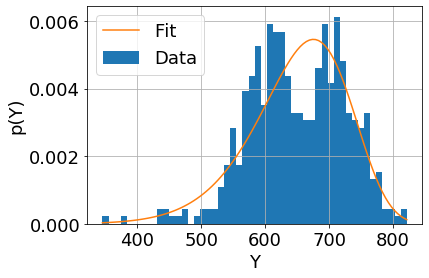

In [62]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
strength.Y.hist(bins=50, density=True, label='Data')
# fit
W=scipy.stats.weibull_min(k,loc=0, scale=x_0) 
plt.plot(x, W.pdf(x), label="Fit")
plt.xlabel('Y')
plt.ylabel('p(Y)')
plt.legend()

Il fit non è eccezionale. La cosa che ci può fare insospettire è la presenza di un doppio picco. Questo potrebbe essere dovuto al fatto che abbiamo mischiato insieme tutti i dati indipendentemente dai fattori sperimentali

**Esercizio** 

Esplorare l'effetto dei vari fattori per cercare di capire quale siano i fattori che influenzano di più la distribuzione. Possiamo proecedere come seque:


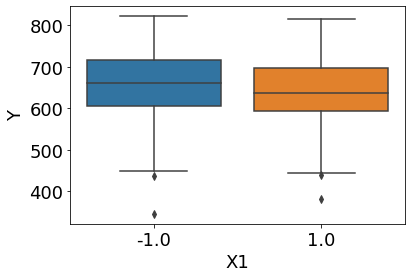

In [64]:
sns.boxplot(data=strength, x="X1", y="Y")

Da questo grafico si vede che il fattore X1 non è molto rilevante. Esplorate gli altri fattori allo stesso modo e poi vedete se il fit migliora separando i dati a seconda dei fattori.

**Esempio:** Separiamo i dati a seconda del fattore batch e poi fittiamo separatamente.

In [69]:
Bat1=strength[strength.Bat==1]
Bat2=strength[strength.Bat==2]

Fittiamo i dati separatamente:

In [70]:
k1, loc, x_1=scipy.stats.weibull_min.fit(Bat1.Y, floc=0)
k2, loc, x_2=scipy.stats.weibull_min.fit(Bat2.Y, floc=0)

Plottiamo i dati separatamente

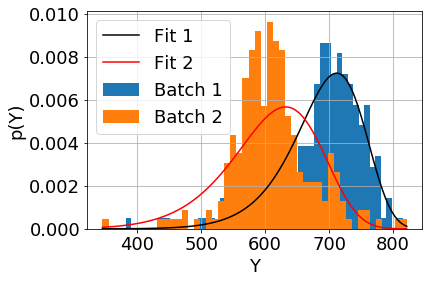

In [78]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
# Istogramma di tutti i dati
Bat1.Y.hist(bins=50, density=True, label='Batch 1')
Bat2.Y.hist(bins=50, density=True, label='Batch 2')
# fit
W1=scipy.stats.weibull_min(k1,loc=0, scale=x_1) 
W2=scipy.stats.weibull_min(k2,loc=0, scale=x_2)
plt.plot(x, W1.pdf(x), label="Fit 1", color="black")
plt.plot(x, W2.pdf(x), label="Fit 2", color="red")
plt.xlabel('Y')
plt.ylabel('p(Y)')
plt.legend()

Distribuzioni cumulate

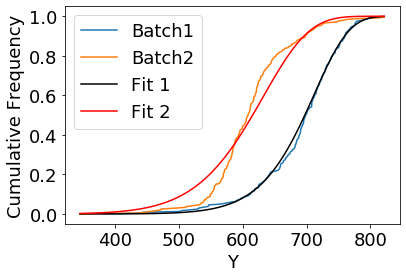

In [83]:
xmin=np.min(strength.Y)
xmax=np.max(strength.Y)
x = np.linspace(xmin,xmax,101)
y1=np.sort(Bat1.Y)
idx1 = [ i/len(y1) for i in range(len(y))]
y2=np.sort(Bat2.Y)
idx2 = [ i/len(y2) for i in range(len(y))]
plt.xlabel('Y')
plt.ylabel('Cumulative Frequency')
plt.plot(y1,idx1,label="Batch1")
plt.plot(y2,idx2,label="Batch2")
plt.plot(x, W1.cdf(x), label="Fit 1", color="black")
plt.plot(x, W2.cdf(x), label="Fit 2", color="red")
plt.legend()